# Demo of Analyze class

In [1]:
from finance import Analyze as fa

### 1. Get data

In [2]:
amzn = fa.get_data("AMZN")
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-04,2050.500000,2013.000000,2026.500000,2039.510010,5721100,2039.510010
2018-09-05,2040.380005,1989.890015,2038.109985,1994.819946,8220600,1994.819946
2018-09-06,2007.500000,1935.209961,2006.510010,1958.310059,7488700,1958.310059
2018-09-07,1975.199951,1937.349976,1938.709961,1952.069946,4892600,1952.069946
2018-09-10,1973.040039,1931.520020,1971.000000,1939.010010,4544800,1939.010010


### 2. Apply analytical methods

In [3]:
amzn = fa.calc_vol(amzn)

In [4]:
fa.high_low(amzn)
fa.moving_avg(amzn)

In [5]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-10-04 to 2019-10-03
Data columns (total 15 columns):
High               251 non-null float64
Low                251 non-null float64
Open               251 non-null float64
Close              251 non-null float64
Volume             251 non-null int64
Adj Close          251 non-null float64
Return             251 non-null float64
Volatility         251 non-null float64
Change             251 non-null float64
Exp_Change         251 non-null float64
Magnitude          251 non-null float64
Abs_Magnitude      251 non-null float64
High_Low_Spread    251 non-null float64
21_day             231 non-null float64
63_day             189 non-null float64
dtypes: float64(14), int64(1)
memory usage: 31.4 KB


### 3. Examine results

In [6]:
amzn['High_Low_Spread'].describe()

count    251.000000
mean       0.023694
std        0.015682
min        0.005228
25%        0.013572
50%        0.019155
75%        0.028788
max        0.110951
Name: High_Low_Spread, dtype: float64

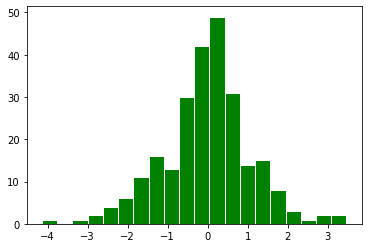

In [7]:
fa.mag_hist(amzn)

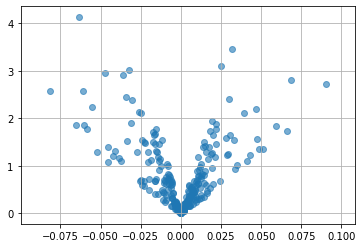

In [8]:
fa.plot_magnitude(amzn)

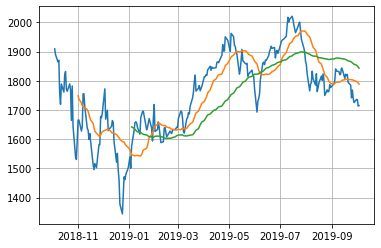

In [9]:
fa.plot_MA(amzn)

### 4. Advanced Analyses

In [10]:
exp = fa.exp_friday(amzn)
exp[['Return', 'Change', 'Abs_Magnitude']].describe()

,Return,Change,Abs_Magnitude
count,11.000000,11.000000,11.000000
mean,-0.009767,-15.582708,0.746838
std,0.019479,29.400665,0.574874
min,-0.058771,-83.380005,0.054298
25%,-0.015664,-26.684937,0.298441
50%,-0.006788,-13.380005,0.602243
75%,-0.000920,-1.854980,1.288003
max,0.015383,26.140015,1.765762


In [12]:
exp.Close - exp.Close // 10 * 10

Date
2018-10-19    4.030029
2018-11-16    3.410034
2018-12-21    7.449951
2019-01-18    6.199951
2019-02-15    7.949951
2019-03-15    2.359985
2019-05-17    9.000000
2019-06-21    1.300049
2019-07-19    4.520020
2019-08-16    2.569946
2019-09-20    4.160034
Name: Close, dtype: float64

In [16]:
low_vol = fa.low_vol_duration(amzn)
low_vol['Days<2sd']

Date
2018-10-12     6
2018-10-25     8
2018-12-26    40
2019-01-30    22
2019-03-11    26
2019-04-26    32
2019-05-03     4
Name: Days<2sd, dtype: int64

In [20]:
amzn['Days<2sd'].tail()

Date
2019-09-27    102
2019-09-30    103
2019-10-01    104
2019-10-02    105
2019-10-03    106
Name: Days<2sd, dtype: int64